# Indoor WiFi Locationing Capstone Project
Author: Jason Rodriguez

## Summary:
This notebook analysis and creates machine learning models to investigate the feasibility of using 'WiFi Fingerprinting' to determine a person's location in an indoor facility. Through evaluating multiple machine learning models to determine which produces the best results. 

## Project Goals:
1. Build and evaluate up to three (3) different machine learning algorithms to determine the best model for recommendation to the client. 

## Project Background:
1. Clint is developing a system to help students/users navigate a complex, unfamiliar interior space on a college campus
2. We are charter to invertigate the feasibility of using WiFi fingerprinting to determine a person's indoor location.

## Purpose of Remaining Sections
The following section are broken into sections that step through the data science process of understanding and making inferences of the available data and building appropriate predictive models. The follow sections are as follows: 
1. Setting Up the Environment
2. Prelimiary Data Understanding
3. PreProcessing / Data Wrangling
4. Feature Engineering
5. Exploratory Data Analysis (EDA)
6. Building & Analyzing Models
7. Analyze Findings
8. Predictions


------------------
# 1.0 Setting Up The Environment
------------------

## 1.1 - Importing Libraries

In [100]:
#Importing Libraries
import numpy as np
import pandas as pd
import scipy
from pandas import Series, DataFrame
#import pandas_profiling
import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import pylab as pylab
from math import sqrt
from pprint import pprint


from sklearn import preprocessing

In [115]:
#SKLearn Components
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler

#Estimators
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model


#Model Metrics
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, confusion_matrix, recall_score, f1_score, classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV

#Cross Validation
from sklearn.model_selection import train_test_split


## 1.2 - Data Acquisition

In [4]:
#Read Data Source Files - 2 files (Training and Validation Sets)

# Dataset 1 - Training
trainingData = pd.read_csv("/Users/JasonRodriguez/Documents/UT-Data-Analytics-Program/2020-Cohort/Course 4/C4-T3/UJIndoorLoc/trainingData.csv")

# Dataset 2 - Validation 
validationData = pd.read_csv("/Users/JasonRodriguez/Documents/UT-Data-Analytics-Program/2020-Cohort/Course 4/C4-T3/UJIndoorLoc/validationData.csv")

In [5]:
#Check Data Load - Training
trainingData.columns

Index(['WAP001', 'WAP002', 'WAP003', 'WAP004', 'WAP005', 'WAP006', 'WAP007',
       'WAP008', 'WAP009', 'WAP010',
       ...
       'WAP520', 'LONGITUDE', 'LATITUDE', 'FLOOR', 'BUILDINGID', 'SPACEID',
       'RELATIVEPOSITION', 'USERID', 'PHONEID', 'TIMESTAMP'],
      dtype='object', length=529)

In [6]:
#Check Data Load - Validation Dataset
validationData.columns

Index(['WAP001', 'WAP002', 'WAP003', 'WAP004', 'WAP005', 'WAP006', 'WAP007',
       'WAP008', 'WAP009', 'WAP010',
       ...
       'WAP520', 'LONGITUDE', 'LATITUDE', 'FLOOR', 'BUILDINGID', 'SPACEID',
       'RELATIVEPOSITION', 'USERID', 'PHONEID', 'TIMESTAMP'],
      dtype='object', length=529)

---
# 2.0 Prelimiary Data Understanding & EDA
---

## 2.1 - Inspecting the Training Dataset 

In [7]:
#Number of observations
len(trainingData)

19937

In [8]:
#First 5 Observations
trainingData.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,100,100,100,100,100,100,100,100,100,100,...,100,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,100,100,100,100,100,100,100,-97,100,100,...,100,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
4,100,100,100,100,100,100,100,100,100,100,...,100,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710


In [9]:
#Statistical Info
trainingData.describe()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
count,19937.000000,19937.000000,19937.0,19937.0,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,...,19937.0,19937.000000,1.993700e+04,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,1.993700e+04
mean,99.823644,99.820936,100.0,100.0,99.613733,97.130461,94.733661,93.820234,94.693936,99.163766,...,100.0,-7464.275947,4.864871e+06,1.674575,1.212820,148.429954,1.833024,9.068014,13.021869,1.371421e+09
std,5.866842,5.798156,0.0,0.0,8.615657,22.931890,30.541335,33.010404,30.305084,12.634045,...,0.0,123.402010,6.693318e+01,1.223078,0.833139,58.342106,0.372964,4.988720,5.362410,5.572054e+05
min,-97.000000,-90.000000,100.0,100.0,-97.000000,-98.000000,-99.000000,-98.000000,-98.000000,-99.000000,...,100.0,-7691.338400,4.864746e+06,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.369909e+09
25%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7594.737000,4.864821e+06,1.000000,0.000000,110.000000,2.000000,5.000000,8.000000,1.371056e+09
50%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7423.060900,4.864852e+06,2.000000,1.000000,129.000000,2.000000,11.000000,13.000000,1.371716e+09
75%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7359.193000,4.864930e+06,3.000000,2.000000,207.000000,2.000000,13.000000,14.000000,1.371721e+09
max,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7300.818990,4.865017e+06,4.000000,2.000000,254.000000,2.000000,18.000000,24.000000,1.371738e+09


In [10]:
#Structure of dataset
trainingData.dtypes

WAP001              int64
WAP002              int64
WAP003              int64
WAP004              int64
WAP005              int64
                    ...  
SPACEID             int64
RELATIVEPOSITION    int64
USERID              int64
PHONEID             int64
TIMESTAMP           int64
Length: 529, dtype: object

In [12]:
#Structure
trainingData.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19937 entries, 0 to 19936
Data columns (total 529 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   WAP001            19937 non-null  int64  
 1   WAP002            19937 non-null  int64  
 2   WAP003            19937 non-null  int64  
 3   WAP004            19937 non-null  int64  
 4   WAP005            19937 non-null  int64  
 5   WAP006            19937 non-null  int64  
 6   WAP007            19937 non-null  int64  
 7   WAP008            19937 non-null  int64  
 8   WAP009            19937 non-null  int64  
 9   WAP010            19937 non-null  int64  
 10  WAP011            19937 non-null  int64  
 11  WAP012            19937 non-null  int64  
 12  WAP013            19937 non-null  int64  
 13  WAP014            19937 non-null  int64  
 14  WAP015            19937 non-null  int64  
 15  WAP016            19937 non-null  int64  
 16  WAP017            19937 non-null  int64

In [13]:
#Identify Missing Values
trainingData.isnull()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19932,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
19933,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
19934,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
19935,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


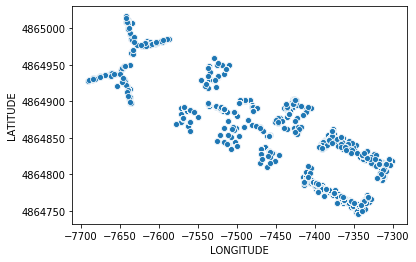

In [14]:
#Plot
sns.scatterplot(data=trainingData, x="LONGITUDE", y="LATITUDE")

In [16]:
#Create Subset of Columns 519:530
columns = trainingData.loc[:,['WAP520', 'LONGITUDE', 'LATITUDE', 'FLOOR', 'BUILDINGID', 'SPACEID', 'RELATIVEPOSITION', 'USERID', 'PHONEID', 'TIMESTAMP']]
columns.head()

,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,100,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,100,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,100,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
4,100,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710


In [17]:
#Check Structure
columns.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19937 entries, 0 to 19936
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   WAP520            19937 non-null  int64  
 1   LONGITUDE         19937 non-null  float64
 2   LATITUDE          19937 non-null  float64
 3   FLOOR             19937 non-null  int64  
 4   BUILDINGID        19937 non-null  int64  
 5   SPACEID           19937 non-null  int64  
 6   RELATIVEPOSITION  19937 non-null  int64  
 7   USERID            19937 non-null  int64  
 8   PHONEID           19937 non-null  int64  
 9   TIMESTAMP         19937 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 1.5 MB


In [18]:
#Summary Statistics
columns.describe()

,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
count,19937.0,19937.000000,1.993700e+04,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,1.993700e+04
mean,100.0,-7464.275947,4.864871e+06,1.674575,1.212820,148.429954,1.833024,9.068014,13.021869,1.371421e+09
std,0.0,123.402010,6.693318e+01,1.223078,0.833139,58.342106,0.372964,4.988720,5.362410,5.572054e+05
min,100.0,-7691.338400,4.864746e+06,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.369909e+09
25%,100.0,-7594.737000,4.864821e+06,1.000000,0.000000,110.000000,2.000000,5.000000,8.000000,1.371056e+09
50%,100.0,-7423.060900,4.864852e+06,2.000000,1.000000,129.000000,2.000000,11.000000,13.000000,1.371716e+09
75%,100.0,-7359.193000,4.864930e+06,3.000000,2.000000,207.000000,2.000000,13.000000,14.000000,1.371721e+09
max,100.0,-7300.818990,4.865017e+06,4.000000,2.000000,254.000000,2.000000,18.000000,24.000000,1.371738e+09


In [19]:
#Check Unique Values for Variables Indicating a Location
trainingData['FLOOR'].unique()

array([2, 0, 3, 4, 1])

In [20]:
trainingData['BUILDINGID'].unique()

array([1, 0, 2])

In [21]:
trainingData['SPACEID'].unique()

array([106, 103, 102, 122, 105, 101, 112, 104, 110, 108, 109, 111, 107,
        15,  29, 117,  16,  28,  22,  10,   2,   4,   3,   5,   6,   9,
        27,   8,   7,  26,  18, 216,  17, 217, 247, 248, 246, 245, 244,
       243, 242, 241, 240, 201, 202, 204, 203, 205, 207, 206, 209, 211,
       208, 210, 212, 214, 213, 215, 121, 219, 221, 222, 218, 220, 250,
       223, 225, 224, 229, 226, 227, 228, 233, 231, 230, 232, 236, 235,
       234, 237, 238, 239, 141, 140, 143, 113, 114, 116, 115, 120, 118,
       128, 119, 129, 125, 124, 131, 127, 132, 126, 133, 134, 137, 135,
       136, 253, 254, 123, 130, 138, 139, 142, 146, 147, 249, 144,   1,
        30,  25,  13,  12,  11,  14])

In [22]:
trainingData['RELATIVEPOSITION'].unique()

array([2, 1])

(array([5249.,    0., 5196.,    0., 9492.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. ]),
 <a list of 5 Patch objects>)

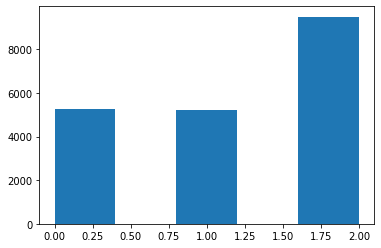

In [24]:
#Histogram of BUILDINGID
plt.hist(trainingData['BUILDINGID'], bins=5)

(array([4369., 5002., 4416., 5048., 1102.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. ]),
 <a list of 5 Patch objects>)

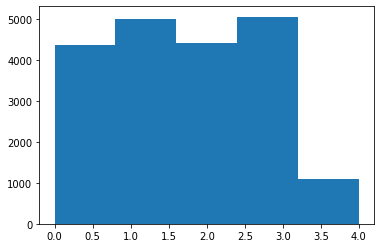

In [25]:
#Histogram of FLOOR
plt.hist(trainingData['FLOOR'], bins=5)

(array([ 242.,  155.,  117.,  116.,  106.,   59.,   42.,   66.,   19.,
           0.,   10.,   19.,   39.,   37.,   22.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,  418.,  833.,  805.,  944., 1010.,  636.,
         523.,  440.,  522.,  521.,  593.,  426.,  561.,  557.,  539.,
         384.,  445.,  414.,  326.,  508.,   96.,  160.,   40.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,  902.,  604.,
         498.,  431.,  371.,  328.,  389.,  411.,  542.,  241.,  294.,
         322.,  226.,  217.,  239.,   99.,  220.,  160.,   99.,   75.,
          79.,  110.,  140.,  140.,   20.,   30.]),
 array([  1.        ,   3

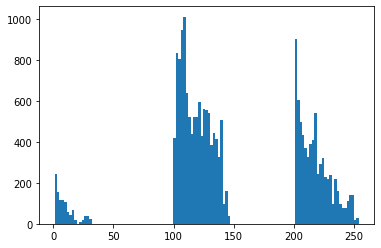

In [27]:
#Histogram of SPACEID
plt.hist(trainingData['SPACEID'], bins=123)

In [29]:
BuildingID = pd.DataFrame(trainingData.groupby(['BUILDINGID', 'FLOOR', 'SPACEID'])['SPACEID'].count())

In [30]:
BuildingID.head(10)

SPACEID
BUILDINGID FLOOR SPACEID         
0          0     102           20
                 106           10
                 107           10
                 110           10
                 111           20
                 112           20
                 113           20
                 114           19
                 115           16
                 116           13

In [31]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [32]:
#Export to Excel Show Duplicative SpaceIDs by building and floors
BuildingID.to_excel(r'/Users/JasonRodriguez/Documents/UT-Data-Analytics-Program/BuildingID.xlsx')

### Feature Engineering

In [36]:
#Create unique ID for predicting specific campus location, the dep var
trainingData['location'] = trainingData['BUILDINGID'].astype(str) + '' + trainingData['FLOOR'].astype(str) + '' + trainingData['SPACEID'].astype(str)

In [37]:
#Validate head to ensure CONCATENATED Correctly
trainingData[['BUILDINGID', 'FLOOR', 'SPACEID', 'location']].head(20)

,BUILDINGID,FLOOR,SPACEID,location
0,1,2,106,12106
1,1,2,106,12106
2,1,2,103,12103
3,1,2,102,12102
4,0,0,122,00122
5,1,2,105,12105
6,1,2,103,12103
7,1,2,101,12101
8,1,2,112,12112
9,1,2,103,12103


In [38]:
trainingData['location'].nunique()

735

#### Note/Observation: there are 735 different classes or rooms locations, to predict. The WiFi Access Point will serve as the independent variables during algorithm training

#### Feature Selection & Sampling

#### Dataset 1: Out-Of-Box (oob)

In [39]:
oob = trainingData.drop(trainingData.columns.to_series()['LONGITUDE':'TIMESTAMP'], axis=1)
oob['location'].nunique()

735

In [40]:
#Data Type of DV is object
oob['location'].dtypes

dtype('O')

In [41]:
oob.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,location
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,12106
1,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,12106
2,100,100,100,100,100,100,100,-97,100,100,...,100,100,100,100,100,100,100,100,100,12103
3,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,12102
4,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,00122


#### Sampling

##### Sample by building to see if metrics can be improved versus full oob dataset

In [42]:
#BuildingID 0 only
Building0 = trainingData[trainingData['BUILDINGID']==0]

In [43]:
#Remove Non-Wap Columns
Building0 = Building0.drop(Building0.columns.to_series()['LONGITUDE':'TIMESTAMP'], axis=1)
Building0

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,location
4,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,00122
7119,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,00102
7120,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,00110
7121,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,00111
7122,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,00107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18492,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,03228
18493,100,100,100,100,100,100,100,100,-75,100,...,100,100,100,100,100,100,100,100,100,03236
18494,100,100,100,100,100,100,100,100,-88,100,...,100,100,100,100,100,100,100,100,100,03235
18496,100,100,100,100,100,100,100,100,-66,100,...,100,100,100,100,100,100,100,100,100,03230


In [44]:
Building0['location'].nunique()

256

In [45]:
Building0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5249 entries, 4 to 18497
Columns: 521 entries, WAP001 to location
dtypes: int64(520), object(1)
memory usage: 20.9+ MB


##### Observations
###### 1. There are variables w/ only a single value of 100, aka zero variance variables. The data description tells us a value of 100 indicates NO wifi signal detention, therefore, columns with a single observation or value (100 = no signal detection) are most likely useless for modeling
###### 2. Direction is to remove zero variance variables from the sampled datasets

In [46]:
#Remove Zero Variance Cols in Building 0 dataset
nunique = Building0.apply(pd.Series.nunique)
cols_to_drop = nunique[nunique == 1].index

In [47]:
Building0 = Building0.drop(cols_to_drop, axis=1)

In [48]:
Building0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5249 entries, 4 to 18497
Columns: 201 entries, WAP001 to location
dtypes: int64(200), object(1)
memory usage: 8.1+ MB


In [49]:
Building0.head()

,WAP001,WAP002,WAP007,WAP008,WAP009,WAP013,WAP014,WAP017,WAP018,WAP019,...,WAP447,WAP452,WAP459,WAP475,WAP494,WAP500,WAP508,WAP515,WAP519,location
4,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,00122
7119,100,100,100,100,100,100,100,100,100,-80,...,100,100,100,100,100,100,100,100,100,00102
7120,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,00110
7121,100,100,100,100,100,100,100,100,100,100,...,100,-86,100,100,100,100,100,100,100,00111
7122,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,00107


##### Notes: Building 0 has 5249 row observations with 200 WAPs columns (Independent Vars) and 1 Location Column (Dep Var)

### Dataset for Building 1

In [50]:
#Building 1 Only
Building1 = trainingData[trainingData['BUILDINGID']==1]

In [51]:
Building1.head(15)

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP,location
0,100,100,100,100,100,100,100,100,100,100,...,-7541.264300,4.864921e+06,2,1,106,2,2,23,1371713733,12106
1,100,100,100,100,100,100,100,100,100,100,...,-7536.621200,4.864934e+06,2,1,106,2,2,23,1371713691,12106
2,100,100,100,100,100,100,100,-97,100,100,...,-7519.152400,4.864950e+06,2,1,103,2,2,23,1371714095,12103
3,100,100,100,100,100,100,100,100,100,100,...,-7524.570400,4.864934e+06,2,1,102,2,2,23,1371713807,12102
5,100,100,100,100,100,100,100,100,100,100,...,-7533.896200,4.864939e+06,2,1,105,2,2,23,1371713841,12105
6,100,100,100,100,100,100,100,100,100,100,...,-7519.152400,4.864950e+06,2,1,103,2,2,23,1371713883,12103
7,100,100,100,100,100,100,100,100,100,100,...,-7527.451100,4.864929e+06,2,1,101,2,2,23,1371713775,12101
8,100,100,100,100,100,100,100,100,100,100,...,-7559.497300,4.864888e+06,2,1,112,2,2,23,1371714307,12112
9,100,100,100,100,100,100,100,100,100,100,...,-7510.437173,4.864949e+06,2,1,103,1,2,23,1371714128,12103
10,100,100,100,100,100,100,100,-83,100,100,...,-7528.816402,4.864959e+06,2,1,104,1,2,23,1371714200,12104


In [52]:
#Remove Unnecessary Columns
Building1 = Building1.drop(Building1.columns.to_series()['LONGITUDE':'TIMESTAMP'], axis=1)
Building1

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,location
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,12106
1,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,12106
2,100,100,100,100,100,100,100,-97,100,100,...,100,100,100,100,100,100,100,100,100,12103
3,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,12102
5,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,12105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19930,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,134
19932,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,131
19934,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,1313
19935,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,13113


In [53]:
Building1['location'].nunique()

162

In [54]:
#Remove Zero Variance Columns in Building 1 dataset
nunique = Building1.apply(pd.Series.nunique)
cols_to_drop = nunique[nunique==1].index

In [55]:
Building1 = Building1.drop(cols_to_drop, axis=1)

In [56]:
Building1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5196 entries, 0 to 19936
Columns: 208 entries, WAP006 to location
dtypes: int64(207), object(1)
memory usage: 8.3+ MB


In [57]:
Building1.head()

,WAP006,WAP008,WAP010,WAP011,WAP012,WAP015,WAP016,WAP017,WAP021,WAP022,...,WAP446,WAP449,WAP454,WAP468,WAP470,WAP478,WAP489,WAP490,WAP503,location
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,12106
1,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,12106
2,100,-97,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,12103
3,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,12102
5,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,12105


##### Notes: Building 1 dataset has 5196 rows/observations with 207 WAPS columns (independent vars) with 1 location column (dep var)

### Dataset: Building 2 Only

In [58]:
#Building 2
Building2=trainingData[trainingData['BUILDINGID']==2]

In [59]:
Building2.head(10)

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP,location
46,100,100,100,100,100,100,100,100,100,100,...,-7331.748000,4.864767e+06,3,2,247,2,2,23,1371716690,23247
47,100,100,100,100,100,100,100,100,100,100,...,-7331.400500,4.864768e+06,3,2,248,2,2,23,1371716637,23248
49,100,100,100,100,100,100,100,100,100,100,...,-7327.492165,4.864767e+06,3,2,247,1,2,23,1371716719,23247
50,100,100,100,100,100,100,100,100,100,100,...,-7336.700400,4.864764e+06,3,2,246,2,2,23,1371716762,23246
51,100,100,100,100,100,100,100,100,100,100,...,-7337.394800,4.864763e+06,3,2,245,2,2,23,1371716797,23245
52,100,100,100,100,100,100,100,100,100,100,...,-7340.524600,4.864758e+06,3,2,244,2,2,23,1371716826,23244
53,100,100,100,100,100,100,100,100,100,100,...,-7341.215000,4.864756e+06,3,2,243,2,2,23,1371716857,23243
54,100,100,100,100,100,100,100,100,100,100,...,-7339.153887,4.864749e+06,3,2,242,1,2,23,1371716935,23242
55,100,100,100,100,100,100,100,100,100,100,...,-7337.232139,4.864753e+06,3,2,243,1,2,23,1371716982,23243
56,100,100,100,100,100,100,100,100,100,100,...,-7344.968400,4.864750e+06,3,2,241,2,2,23,1371717041,23241


In [60]:
#Remove Unnecessary Columns
Building2 = Building2.drop(Building2.columns.to_series()['LONGITUDE':'TIMESTAMP'], axis=1)
Building2

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,location
46,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,-93,100,100,100,23247
47,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,-89,100,100,100,23248
49,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,-91,100,100,23247
50,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,-90,100,100,100,23246
51,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,-92,100,100,100,23245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19926,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,-87,100,100,100,21206
19927,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,-84,-77,100,100,100,21141
19928,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,-90,-87,100,100,100,21207
19931,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,-91,100,100,100,21140


In [61]:
Building2['location'].nunique()

317

In [62]:
#Remove zero variance columns in building 2 dataset
nunique = Building2.apply(pd.Series.nunique)
cols_to_drop = nunique[nunique == 1].index

In [63]:
Building2 = Building2.drop(cols_to_drop, axis=1)

In [64]:
Building2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9492 entries, 46 to 19933
Columns: 204 entries, WAP005 to location
dtypes: int64(203), object(1)
memory usage: 14.8+ MB


In [65]:
Building2.head()

,WAP005,WAP006,WAP011,WAP012,WAP018,WAP059,WAP060,WAP061,WAP062,WAP063,...,WAP509,WAP510,WAP511,WAP512,WAP513,WAP514,WAP516,WAP517,WAP518,location
46,100,100,100,100,100,-97,100,-85,-90,-80,...,100,100,100,100,100,100,100,-93,100,23247
47,100,100,100,100,100,100,100,-84,-84,-83,...,100,100,100,100,100,100,100,-89,100,23248
49,100,100,100,100,100,100,100,-89,-90,100,...,100,100,100,100,100,100,100,100,-91,23247
50,100,100,100,100,100,-97,100,-74,-72,-75,...,100,100,100,100,100,100,100,-90,100,23246
51,100,100,100,100,100,100,100,-58,-58,-70,...,100,100,100,100,100,100,100,-92,100,23245


##### Notes: Building 2 dataset has 9492 observations w/ 203 WAP cols (indep var) and 1 location col (dep var)

In [66]:
#Move Dependent Variable 'location' to front for easy x and y identification
oob = oob[['location'] + [col for col in oob.columns if col != 'location']]

In [67]:
#Move Dependent Variable 'location' to front for easy x and y identification
Building0 = Building0[['location'] + [col for col in Building0.columns if col != 'location']]

In [69]:
#Move Dependent Variable 'location' to front for easy x and y identification
Building1 = Building1[['location'] + [col for col in Building1.columns if col != 'location']]

In [70]:
#Move Dependent Variable 'location' to front for easy x and y identification
Building2 = Building2[['location'] + [col for col in Building2.columns if col != 'location']]

***
## Modeling
***

### Modeling OOB
Try 4 non-linear based algorithms

In [75]:
#Features
X = oob.iloc[:,1:]

#Target Var
y = oob['location']

#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=123)

In [76]:
X_train.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520
7135,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
10479,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
15179,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
4673,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
2464,100,100,100,100,-92,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100


In [77]:
y_train.head()

7135     00123
10479    03127
15179    10225
4673     20122
2464     24141
Name: location, dtype: object

In [80]:
#Prepeare Model
algos_Class = []
algos_Class.append(('Decision Tree', DecisionTreeClassifier(criterion='entropy')))
algos_Class.append(('Random Forest', RandomForestClassifier()))
algos_Class.append(('Support Vector Machine', SVC(kernel='rbf')))
algos_Class.append(('K Nearest Neighbors', KNeighborsClassifier()))

In [91]:
#Filter Warnings
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [94]:
#Evaluate each model in turn on OOB
results = []
names = []
for name, model in algos_Class:
    result = cross_val_score(model, X, y, cv=3, scoring='accuracy')
    names.append(name)
    results.append(result)

In [96]:
#Cross Validation Results
for i in range(len(names)):
    print(names[i], results[i].mean(), results[i].std())

Decision Tree 0.4574923194936659 0.0658722684637514
Random Forest 0.6730719859102722 0.07652017810471876
Support Vector Machine 0.512967279076801 0.07101144891264868
K Nearest Neighbors 0.4745471986483909 0.07392146035406237


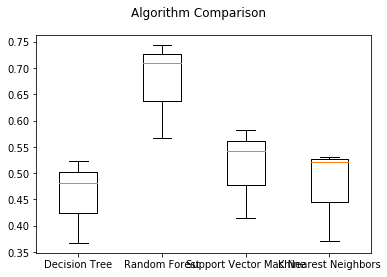

In [97]:
#Boxplot Algorithm Comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

 ## Model Tuning for OOB

In [101]:
#Tune Random Forst
rf = RandomForestClassifier()

#parameters currently in use
pprint(rf.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [102]:
#Model Tuning
rf = RandomForestClassifier(criterion='entropy',
                           n_estimators = 200, 
                           n_jobs = -1, 
                           random_state=123)

rf_oob = rf.fit(X_train, y_train)

#predictions
y_preds = rf_oob.predict(X_test)

#assessment
print('Accuracy Score: '), accuracy_score(y_test, y_preds)

Accuracy Score: 


(None, 0.8138415245737212)

In [105]:
#Evaluate Metrics
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

       00102       1.00      0.67      0.80         3
       00106       0.75      1.00      0.86         3
       00107       1.00      0.50      0.67         4
       00110       1.00      1.00      1.00         3
       00111       1.00      0.70      0.82        10
       00112       1.00      0.80      0.89         5
       00113       1.00      1.00      1.00         4
       00114       1.00      0.75      0.86         8
       00115       0.67      1.00      0.80         2
       00116       0.67      1.00      0.80         2
       00117       0.50      0.50      0.50         2
       00118       0.50      0.67      0.57         3
       00119       1.00      0.67      0.80         6
       00120       0.80      0.92      0.86        13
       00121       0.67      1.00      0.80         4
       00122       0.67      0.33      0.44         6
       00123       0.80      0.57      0.67         7
       00125       0.75    

In [106]:
#Random Forest OOB Metrics Compiled
print(('Accuracy: '), accuracy_score(y_test, y_preds))
print(('Precision: '), precision_score(y_test, y_preds, average = 'weighted'))
print(('Recall: '), recall_score(y_test, y_preds, average = 'weighted', labels=np.unique(y_preds)))
print(('F1: '), f1_score(y_test, y_preds, average='weighted'))

Accuracy:  0.8138415245737212
Precision:  0.8586923106396787
Recall:  0.819264943457189
F1:  0.8161600475081973


##### Notes: 
Although accuracy is a useful metric, for this problem, recall is also important. Recall gauges how many spaces our model correctly classifies (True Positives) out of all Actual Positives within each class. There is a high cost associated with a False Negative (incorrect room prediction) when being considered for deploying in a Smart Phone app. To get another sense of how well our model did, we will sum the number of spaces that fall within Recall quartiles and compare at the very end.

In [108]:
#Create Dataframe of metrics
RF_OOB = pd.DataFrame([accuracy_score(y_test, y_preds),
                      precision_score(y_test, y_preds, average='weighted'),
                      recall_score(y_test, y_preds, average='weighted', labels=np.unique(y_preds)),
                      f1_score(y_test, y_preds, average='weighted')])

#Rename Col and Indexes
RF_OOB = RF_OOB.rename(columns={0:'RF_OOB'}, 
                      index = {0:'Accuracy', 1: 'Precision (weighted)', 2: 'Recall (weighted)', 3: 'F1 (weighted)'})

RF_OOB.head()

,RF_OOB
Accuracy,0.813842
Precision (weighted),0.858692
Recall (weighted),0.819265
F1 (weighted),0.816160


In [109]:
#Compare RF Recall Count by Quartile
rf_oob_recall = pd.DataFrame(recall_score(y_test, y_preds, average=None))
rf_oob_recall.head(10)

,0
0,0.666667
1,1.000000
2,0.500000
3,1.000000
4,0.700000
5,0.800000
6,1.000000
7,0.750000
8,1.000000
9,1.000000


In [110]:
rf_oob_quartile = pd.DataFrame(rf_oob_recall[0].value_counts(bins=4, sort=False))

#rename cols
rf_oob_quartile = rf_oob_quartile.rename(columns={0: 'oob'})

rf_oob_quartile.head()

,oob
"(-0.002, 0.25]",20
"(0.25, 0.5]",88
"(0.5, 0.75]",166
"(0.75, 1.0]",456


In [111]:
# create dataframe comparing predictions to y_test 'ground truth'
y_test = pd.DataFrame(y_test)
y_test.head()

# predictions dataframe
y_preds = pd.DataFrame(y_preds)
# rename prediction column
y_preds = y_preds.rename(columns={0: 'RFpreds_oob'})

# comparison dataframe
rf_compare = pd.concat([y_test, y_preds.set_index(y_test.index)], axis=1)
rf_compare.head(10)

,location,RFpreds_oob
10837,02117,02117
1060,23215,23215
18242,00224,00224
7195,01225,01222
1227,24203,24203
2419,23253,23254
13951,11105,11105
4196,21130,21113
6495,12207,12207
18510,20138,20138


In [112]:
# tune SVC on oob2
svc = SVC()

# parameters currently in use
pprint(svc.get_params())

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}


In [113]:
# manual tuning
param_grid = {
    'C': [1, 10, 100, 1000]
}

In [116]:
gs_svc = GridSearchCV(estimator=svc, param_grid=param_grid, cv=3, n_jobs=-1)
gs_svc.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1, param_grid={'C': [1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [117]:
gs_svc.best_params_

{'C': 10}

In [118]:
# model tuning
svc = SVC(C=10, random_state=123)
svc_oob = svc.fit(X_train, y_train)

# predictions
y_preds = svc_oob.predict(X_test)
# assessment
print('Accuracy Score: '), accuracy_score(y_test, y_preds)

Accuracy Score: 


(None, 0.6906720160481444)

In [119]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

       00102       0.67      0.67      0.67         3
       00106       0.67      0.67      0.67         3
       00107       0.67      0.50      0.57         4
       00110       1.00      1.00      1.00         3
       00111       1.00      0.40      0.57        10
       00112       0.33      0.40      0.36         5
       00113       0.38      0.75      0.50         4
       00114       1.00      0.62      0.77         8
       00115       1.00      1.00      1.00         2
       00116       0.67      1.00      0.80         2
       00117       0.25      0.50      0.33         2
       00118       1.00      0.33      0.50         3
       00119       0.75      0.50      0.60         6
       00120       0.50      0.77      0.61        13
       00121       0.50      0.50      0.50         4
       00122       0.00      0.00      0.00         6
       00123       0.75      0.43      0.55         7
       00125       1.00    

In [120]:
# svc oob metrics compiled
print(('Accuracy: '), accuracy_score(y_test, y_preds))
print(('Precision: '), precision_score(y_test, y_preds, average='weighted'))
print(('Recall: '), recall_score(y_test, y_preds, average='weighted', labels=np.unique(y_preds)))
print(('F1: '), f1_score(y_test, y_preds, average='weighted'))

Accuracy:  0.6906720160481444
Precision:  0.7465028557128497
Recall:  0.6952746365105008
F1:  0.6935610161362135


In [121]:
# create dataframe of metrics
SVC_oob = pd.DataFrame([accuracy_score(y_test, y_preds),
                       precision_score(y_test, y_preds, average='weighted'),
                       recall_score(y_test, y_preds, average='weighted', labels=np.unique(y_preds)),
                       f1_score(y_test, y_preds, average='weighted')])

# rename column and indexes
SVC_oob = SVC_oob.rename(columns={0: 'SVC_oob'},
                        index={0: 'Accuracy', 1: 'Precision (weighted)', 2: 'Recall (weighted)', 3: 'F1 (weighted)'})

SVC_oob.head()

,SVC_oob
Accuracy,0.690672
Precision (weighted),0.746503
Recall (weighted),0.695275
F1 (weighted),0.693561


In [122]:
# create dataframe comparing predictions to y_test 'ground truth'
y_test = pd.DataFrame(y_test)
y_test.head()

# predictions dataframe
y_preds = pd.DataFrame(y_preds)
# rename prediction column
y_preds = y_preds.rename(columns={0: 'SVCpreds_oob'})

# comparison dataframe
svc_oob_compare = pd.concat([y_test, y_preds.set_index(y_test.index)], axis=1)
svc_oob_compare.head(10)

,location,SVCpreds_oob
10837,02117,02118
1060,23215,23215
18242,00224,00224
7195,01225,01224
1227,24203,24203
2419,23253,23254
13951,11105,11103
4196,21130,21129
6495,12207,12207
18510,20138,20138


### Results
Random Forest
Accuracy: 0.8138415245737212
Precision: 0.8586923106396787
Recall: 0.819264943457189
F1: 0.8161600475081973

SVC
Accuracy: 0.6906720160481444
Precision: 0.7465028557128497
Recall: 0.6952746365105008
F1: 0.6935610161362135

Random Forest is top model for oob dataset

## Model for Individual Buildings

-BUILDING 0-

In [123]:
# features
X = Building0.iloc[:,1:]

# target variable
y = Building0['location']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state = 123)

In [124]:
X_train.head()

,WAP001,WAP002,WAP007,WAP008,WAP009,WAP013,WAP014,WAP017,WAP018,WAP019,...,WAP443,WAP447,WAP452,WAP459,WAP475,WAP494,WAP500,WAP508,WAP515,WAP519
8620,100,100,-93,100,-75,-72,-67,100,100,100,...,100,100,100,100,100,100,100,100,100,100
9048,100,100,-92,100,-88,-75,-73,100,100,100,...,100,100,100,100,100,100,100,100,100,100
8226,100,100,-96,100,100,-71,-71,100,100,100,...,100,100,100,100,100,100,100,100,100,100
17929,100,100,100,100,100,-63,-63,100,100,100,...,100,100,100,100,100,100,100,100,100,100
16670,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100


In [125]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3936 entries, 8620 to 16829
Columns: 200 entries, WAP001 to WAP519
dtypes: int64(200)
memory usage: 6.0 MB


In [126]:
# prepare models
algos_Class = []
algos_Class.append(('Decision Tree', DecisionTreeClassifier()))
algos_Class.append(('Random Forest', RandomForestClassifier()))
algos_Class.append(('Support Vector', SVC(kernel='rbf')))
algos_Class.append(('K Nearest Neighbors', KNeighborsClassifier()))

In [127]:
# evaluate each model in turn on Building0
results = []
names = []
for name, model in algos_Class:
    result = cross_val_score(model, X, y, cv=3, scoring='accuracy')
    names.append(name)
    results.append(result)

In [128]:
# cross validation results
for i in range(len(names)):
    print(names[i], results[i].mean(), results[i].std())

Decision Tree 0.4374513871872363 0.16193319558130936
Random Forest 0.6736977320373546 0.20866486547227314
Support Vector 0.4557439625364153 0.18261042239650624
K Nearest Neighbors 0.43422200441068365 0.19887551867467318


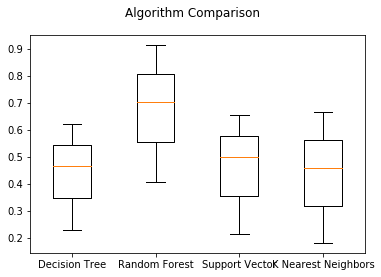

In [129]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [130]:
# model tuning random forest Building 0
rfB0 = RandomForestClassifier(criterion='entropy',
                              n_estimators=200,
                              n_jobs=-1,
                             random_state=123)
rf_B0 = rfB0.fit(X_train, y_train)

# predictions
y_preds = rf_B0.predict(X_test)
# assessment
print('Accuracy Score: '), accuracy_score(y_test, y_preds)

Accuracy Score: 


(None, 0.7677075399847677)

In [131]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

       00102       1.00      1.00      1.00         5
       00106       1.00      1.00      1.00         1
       00107       1.00      1.00      1.00         1
       00110       1.00      0.75      0.86         4
       00111       0.75      0.75      0.75         4
       00112       1.00      0.75      0.86         4
       00113       1.00      0.88      0.93         8
       00114       1.00      0.67      0.80         3
       00115       0.50      0.75      0.60         4
       00116       0.67      0.40      0.50         5
       00117       0.00      0.00      0.00         0
       00118       0.75      0.60      0.67         5
       00119       1.00      0.62      0.77         8
       00120       0.62      1.00      0.76         8
       00121       1.00      0.62      0.77         8
       00122       1.00      0.67      0.80         6
       00123       0.57      1.00      0.73         4
       00125       0.00    

In [132]:
# Random Forest Building 0 metrics compiled
print(('Accuracy: '), accuracy_score(y_test, y_preds))
print(('Precision: '), precision_score(y_test, y_preds, average='weighted'))
print(('Recall: '), recall_score(y_test, y_preds, average='weighted', labels=np.unique(y_preds), zero_division=1))
print(('F1: '), f1_score(y_test, y_preds, average='weighted'))

Accuracy:  0.7677075399847677
Precision:  0.815282760313225
Recall:  0.7694656488549618
F1:  0.766309817116171


In [133]:
# create dataframe of metrics
RF_B0 = pd.DataFrame([accuracy_score(y_test, y_preds),
                      precision_score(y_test, y_preds, average='weighted'),
                      recall_score(y_test, y_preds, average='weighted', zero_division=1),
                     f1_score(y_test, y_preds, average='weighted')])

# rename column and indexes
RF_B0 = RF_B0.rename(columns={0: 'RF_B0'},
                     index={0: 'Accuracy',
                            1: 'Precision (weighted)',
                            2: 'Recall (weighted)',
                            3: 'F1 (weighted)'})

RF_B0.head()

,RF_B0
Accuracy,0.767708
Precision (weighted),0.815283
Recall (weighted),0.767708
F1 (weighted),0.766310


In [134]:
# compare RF recall counts by quartile
rf_B0_recall = pd.DataFrame(recall_score(y_test, y_preds, average=None))
rf_B0_recall.head(10)

,0
0,1.000000
1,1.000000
2,1.000000
3,0.750000
4,0.750000
5,0.750000
6,0.875000
7,0.666667
8,0.750000
9,0.400000


In [135]:
rf_B0_quartile = pd.DataFrame(rf_B0_recall[0].value_counts(bins=4, sort=False))

# rename column
rf_B0_quartile = rf_B0_quartile.rename(columns={0: 'Building 0'})

rf_B0_quartile.head()

,Building 0
"(-0.002, 0.25]",5
"(0.25, 0.5]",40
"(0.5, 0.75]",70
"(0.75, 1.0]",141


In [136]:
# manual tuning support vector Building 0
param_grid = {
    'C': [1, 10, 100, 1000]
}

In [137]:
gs_svcB0 = GridSearchCV(estimator=svc, param_grid=param_grid, cv=3, n_jobs=-1)
gs_svcB0.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=10, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=123, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1, param_grid={'C': [1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [138]:
gs_svcB0.best_params_

{'C': 1000}

In [139]:
# model tuning support vector Building 0
svcB0 = SVC(C=1000, random_state=123)
svc_B0 = svcB0.fit(X_train, y_train)

# predictions
y_preds = svc_B0.predict(X_test)
# assessment
print('Accuracy Score: '), accuracy_score(y_test, y_preds)

Accuracy Score: 


(None, 0.6153846153846154)

In [140]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

       00102       1.00      0.80      0.89         5
       00106       0.50      1.00      0.67         1
       00107       0.00      0.00      0.00         1
       00110       0.67      1.00      0.80         4
       00111       0.25      0.25      0.25         4
       00112       0.60      0.75      0.67         4
       00113       0.83      0.62      0.71         8
       00114       0.67      0.67      0.67         3
       00115       0.43      0.75      0.55         4
       00116       0.50      0.40      0.44         5
       00117       0.00      0.00      0.00         0
       00118       1.00      0.40      0.57         5
       00119       0.86      0.75      0.80         8
       00120       0.70      0.88      0.78         8
       00121       1.00      0.38      0.55         8
       00122       0.25      0.17      0.20         6
       00123       0.33      0.50      0.40         4
       00125       0.00    

In [141]:
# svc B0 metrics compiled
print(('Accuracy: '), accuracy_score(y_test, y_preds))
print(('Precision: '), precision_score(y_test, y_preds, average='weighted'))
print(('Recall: '), recall_score(y_test, y_preds, average='weighted', labels=np.unique(y_preds)))
print(('F1: '), f1_score(y_test, y_preds, average='weighted'))

Accuracy:  0.6153846153846154
Precision:  0.6702198622229086
Recall:  0.6210607225211375
F1:  0.6141644927115418


In [142]:
# create dataframe of metrics
SVC_B0 = pd.DataFrame([accuracy_score(y_test, y_preds),
                       precision_score(y_test, y_preds, average='weighted'),
                       recall_score(y_test, y_preds, average='weighted', labels=np.unique(y_preds)),
                       f1_score(y_test, y_preds, average='weighted')])

# rename column and indexes
SVC_B0 = SVC_B0.rename(columns={0: 'SVC_B0'},
                        index={0: 'Accuracy', 1: 'Precision (weighted)', 2: 'Recall (weighted)', 3: 'F1 (weighted)'})

SVC_B0.head()

,SVC_B0
Accuracy,0.615385
Precision (weighted),0.670220
Recall (weighted),0.621061
F1 (weighted),0.614164


In [143]:
# create dataframe comparing predictions to y_test 'ground truth'
y_test = pd.DataFrame(y_test)
y_test.head()

# predictions dataframe
y_preds = pd.DataFrame(y_preds)
# rename prediction column
y_preds = y_preds.rename(columns={0: 'SVCpreds_B0'})

# comparison dataframe
svc_B0_compare = pd.concat([y_test, y_preds.set_index(y_test.index)], axis=1)
svc_B0_compare.head(10)

,location,SVCpreds_B0
18076,01136,01136
15848,01124,01124
16153,01130,01130
18150,03106,03106
8069,01235,00222
18006,01108,01108
17902,03131,03131
15958,02140,02140
10271,00118,00116
9883,01221,01224


### Building 0 Results
Random Forest
Accuracy: 0.7677075399847677
Precision: 0.815282760313225
Recall: 0.7694656488549618
F1: 0.766309817116171
SVC
Accuracy: 0.6153846153846154
Precision: 0.6702198622229086
Recall: 0.6210607225211375
F1: 0.6141644927115418
Random Forest is top model for Building 0 dataset
Metrics are not quite as high as metrics for oob2 dataset

## Model Building: Building 1

In [144]:
# features
X = Building1.iloc[:,1:]

# target variable
y = Building1['location']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state = 123)

In [145]:
# prepare models
algos_Class = []
algos_Class.append(('Decision Tree', DecisionTreeClassifier(criterion='entropy')))
algos_Class.append(('Random Forest', RandomForestClassifier()))
algos_Class.append(('Support Vector', SVC(kernel='rbf')))
algos_Class.append(('K Nearest Neighbors', KNeighborsClassifier()))

In [146]:
 #evaluate each model in turn on Building1
results = []
names = []
for name, model in algos_Class:
    result = cross_val_score(model, X, y, cv=3, scoring='accuracy')
    names.append(name)
    results.append(result)

In [147]:
# cross validation results
for i in range(len(names)):
    print(names[i], results[i].mean(), results[i].std())

Decision Tree 0.6185527328714396 0.03742460002581406
Random Forest 0.7888760585065434 0.041872282535711805
Support Vector 0.6272132409545804 0.04136768763909716
K Nearest Neighbors 0.5919938414164743 0.05318119966197883


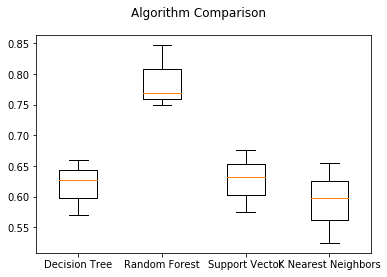

In [148]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#### Notes: RF is again best model

In [149]:
# model tuning
rfB1 = RandomForestClassifier(criterion='entropy',
                              n_estimators=400,
                              n_jobs=-1,
                             random_state=123)
rf_B1 = rfB1.fit(X_train, y_train)

# predictions
y_preds = rf_B1.predict(X_test)
# assessment
print('Accuracy Score: '), accuracy_score(y_test, y_preds)

Accuracy Score: 


(None, 0.8791377983063895)

In [150]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

         101       0.89      1.00      0.94         8
        1010       1.00      0.88      0.93         8
       10107       1.00      1.00      1.00         5
       10108       0.83      1.00      0.91         5
       10110       1.00      0.75      0.86         4
       10111       1.00      1.00      1.00         2
       10112       0.70      1.00      0.82         7
       10113       0.75      0.50      0.60         6
       10114       1.00      0.83      0.91         6
       10115       1.00      1.00      1.00         2
       10116       0.86      1.00      0.92         6
       10117       1.00      0.80      0.89         5
       10118       1.00      1.00      1.00         3
       10119       1.00      1.00      1.00         6
       10121       1.00      1.00      1.00         2
       10122       1.00      1.00      1.00         5
        1015       1.00      1.00      1.00         3
        1016       1.00    

In [151]:
# Random Forest Building 1 metrics compiled
print(('Accuracy: '), accuracy_score(y_test, y_preds))
print(('Precision: '), precision_score(y_test, y_preds, average='weighted'))
print(('Recall: '), recall_score(y_test, y_preds, average='weighted', labels=np.unique(y_preds), zero_division=1))
print(('F1: '), f1_score(y_test, y_preds, average='weighted'))

Accuracy:  0.8791377983063895
Precision:  0.8950421538198201
Recall:  0.8852713178294573
F1:  0.8766795872718322


In [152]:
# create dataframe of metrics
RF_B1 = pd.DataFrame([accuracy_score(y_test, y_preds),
                      precision_score(y_test, y_preds, average='weighted'),
                      recall_score(y_test, y_preds, average='weighted', labels=np.unique(y_preds), zero_division=1),
                     f1_score(y_test, y_preds, average='weighted')])

In [153]:
# rename column and indexes
RF_B1 = RF_B1.rename(columns={0: 'RF_B1'},
                     index={0: 'Accuracy',
                            1: 'Precision (weighted)',
                            2: 'Recall (weighted)',
                            3: 'F1 (weighted)'})

RF_B1.head()

,RF_B1
Accuracy,0.879138
Precision (weighted),0.895042
Recall (weighted),0.885271
F1 (weighted),0.876680


In [154]:
# compare RF recall counts by quartile
rf_B1_recall = pd.DataFrame(recall_score(y_test, y_preds, average=None))
rf_B1_recall.head(10)

,0
0,1.000000
1,0.875000
2,1.000000
3,1.000000
4,0.750000
5,1.000000
6,1.000000
7,0.500000
8,0.833333
9,1.000000


In [155]:
rf_B1_quartile = pd.DataFrame(rf_B1_recall[0].value_counts(bins=4, sort=False))

# rename column
rf_B1_quartile = rf_B1_quartile.rename(columns={0: 'Building 1'})

rf_B1_quartile.head()

,Building 1
"(-0.002, 0.25]",4
"(0.25, 0.5]",13
"(0.5, 0.75]",18
"(0.75, 1.0]",125


In [156]:
# manual tuning SVC Building 1
param_grid = {
    'C': [1, 10, 100, 1000]
}

In [157]:
gs_svcB1 = GridSearchCV(estimator=svc, param_grid=param_grid, cv=3, n_jobs=-1)
gs_svcB1.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=10, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=123, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1, param_grid={'C': [1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [158]:
gs_svcB1.best_params_

{'C': 1000}

In [159]:
# model tuning
svcB1 = SVC(C=1000, random_state=123)
svc_B1 = svcB1.fit(X_train, y_train)

# predictions
y_preds = svc_B1.predict(X_test)
# assessment
print('Accuracy Score: '), accuracy_score(y_test, y_preds)

Accuracy Score: 


(None, 0.7428791377983064)

In [160]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

         101       0.89      1.00      0.94         8
        1010       0.75      0.75      0.75         8
       10107       0.80      0.80      0.80         5
       10108       1.00      0.40      0.57         5
       10110       1.00      0.50      0.67         4
       10111       0.40      1.00      0.57         2
       10112       0.36      0.57      0.44         7
       10113       0.75      0.50      0.60         6
       10114       0.67      1.00      0.80         6
       10115       1.00      1.00      1.00         2
       10116       1.00      1.00      1.00         6
       10117       1.00      1.00      1.00         5
       10118       0.75      1.00      0.86         3
       10119       0.86      1.00      0.92         6
       10121       1.00      0.50      0.67         2
       10122       0.83      1.00      0.91         5
        1015       1.00      1.00      1.00         3
        1016       1.00    

In [161]:
# svc B1 metrics compiled
print(('Accuracy: '), accuracy_score(y_test, y_preds))
print(('Precision: '), precision_score(y_test, y_preds, average='weighted'))
print(('Recall: '), recall_score(y_test, y_preds, average='weighted', labels=np.unique(y_preds), zero_division=1))
print(('F1: '), f1_score(y_test, y_preds, average='weighted'))

Accuracy:  0.7428791377983064
Precision:  0.7662663459619411
Recall:  0.7474825716498839
F1:  0.7396721719869349


In [162]:
# create dataframe of metrics
SVC_B1 = pd.DataFrame([accuracy_score(y_test, y_preds),
                       precision_score(y_test, y_preds, average='weighted'),
                       recall_score(y_test, y_preds, average='weighted', labels=np.unique(y_preds), zero_division=1),
                       f1_score(y_test, y_preds, average='weighted')])

# rename column and indexes
SVC_B1 = SVC_B1.rename(columns={0: 'SVC_B1'},
                        index={0: 'Accuracy', 1: 'Precision (weighted)', 2: 'Recall (weighted)', 3: 'F1 (weighted)'})

SVC_B1.head()

,SVC_B1
Accuracy,0.742879
Precision (weighted),0.766266
Recall (weighted),0.747483
F1 (weighted),0.739672


#### Results
Random Forest
Accuracy: 0.8791377983063895
Precision: 0.8950421538198201
Recall: 0.8852713178294573
F1: 0.8766795872718322
SVC
Accuracy: 0.7428791377983064
Precision: 0.7662663459619411
Recall: 0.7474825716498839
F1: 0.7396721719869349
Random Forest is top model for Building 1 dataset
Metrics are higher than oob2 dataset

## Modeling Building: Building 2

In [163]:
# features
X = Building2.iloc[:,1:]

# target variable
y = Building2['location']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state = 123)

In [164]:
# prepare models
algos_Class = []
algos_Class.append(('Decision Tree', DecisionTreeClassifier()))
algos_Class.append(('Random Forest', RandomForestClassifier()))
algos_Class.append(('Support Vector', SVC(kernel='rbf')))
algos_Class.append(('K Nearest Neighbors', KNeighborsClassifier()))

In [165]:
# evaluate each model in turn on Building2
results = []
names = []
for name, model in algos_Class:
    result = cross_val_score(model, X, y, cv=3, scoring='accuracy')
    names.append(name)
    results.append(result)

In [166]:
# cross validation results Building 2
for i in range(len(names)):
    print(names[i], results[i].mean(), results[i].std())

Decision Tree 0.38895912347239786 0.05823052704073705
Random Forest 0.6153603034134008 0.07068113763719902
Support Vector 0.503898019384745 0.06716576589553282
K Nearest Neighbors 0.43605141171512857 0.05426000011350143


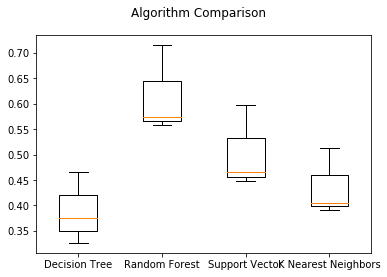

In [167]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Notes: RF top model for building 2

In [168]:
# model tuning random forest Building 2
rfB2 = RandomForestClassifier(criterion='entropy',
                              n_estimators=600,
                              n_jobs=-1,
                             random_state=123)
rf_B2 = rfB2.fit(X_train, y_train)

# predictions
y_preds = rf_B2.predict(X_test)
# assessment
print('Accuracy Score: '), accuracy_score(y_test, y_preds)

Accuracy Score: 


(None, 0.8238516645596292)

In [169]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

       20101       0.75      0.75      0.75         4
       20103       0.91      0.77      0.83        13
       20104       0.78      0.93      0.85        15
       20106       1.00      0.86      0.92         7
       20107       1.00      0.82      0.90        11
       20108       0.40      1.00      0.57         2
       20110       1.00      0.70      0.82        10
       20111       1.00      0.92      0.96        12
       20112       0.89      1.00      0.94         8
       20113       1.00      1.00      1.00         2
       20117       1.00      0.62      0.77         8
       20118       0.92      1.00      0.96        11
       20119       0.86      0.92      0.89        13
       20120       0.64      0.88      0.74         8
       20121       1.00      0.93      0.96        14
       20122       0.92      0.92      0.92        13
       20124       0.77      1.00      0.87        17
       20125       1.00    

In [170]:
# Random Forest Building 2 metrics compiled
print(('Accuracy: '), accuracy_score(y_test, y_preds))
print(('Precision: '), precision_score(y_test, y_preds, average='weighted'))
print(('Recall: '), recall_score(y_test, y_preds, average='weighted', labels=np.unique(y_preds), zero_division=1))
print(('F1: '), f1_score(y_test, y_preds, average='weighted'))

Accuracy:  0.8238516645596292
Precision:  0.8905551274694012
Recall:  0.8245466048080978
F1:  0.8325727025030154


In [171]:
# create dataframe of metrics
RF_B2 = pd.DataFrame([accuracy_score(y_test, y_preds),
                      precision_score(y_test, y_preds, average='weighted'),
                      recall_score(y_test, y_preds, average='weighted', labels=np.unique(y_preds), zero_division=1),
                     f1_score(y_test, y_preds, average='weighted')])

# rename column and indexes
RF_B2 = RF_B2.rename(columns={0: 'RF_B2'},
                     index={0: 'Accuracy',
                            1: 'Precision (weighted)',
                            2: 'Recall (weighted)',
                            3: 'F1 (weighted)'})

RF_B2.head()

,RF_B2
Accuracy,0.823852
Precision (weighted),0.890555
Recall (weighted),0.824547
F1 (weighted),0.832573


In [172]:
# compare RF recall counts by quartile
rf_B2_recall = pd.DataFrame(recall_score(y_test, y_preds, average=None))
rf_B2_recall.head(10)

,0
0,0.750000
1,0.769231
2,0.933333
3,0.857143
4,0.818182
5,1.000000
6,0.700000
7,0.916667
8,1.000000
9,1.000000


In [173]:
rf_B2_quartile = pd.DataFrame(rf_B2_recall[0].value_counts(bins=4, sort=False))

# rename column
rf_B2_quartile = rf_B2_quartile.rename(columns={0: 'Building 2'})

rf_B2_quartile.head()

,Building 2
"(-0.002, 0.25]",9
"(0.25, 0.5]",36
"(0.5, 0.75]",53
"(0.75, 1.0]",217


In [174]:
# manual tuning support vector Building 2
param_grid = {
    'C': [1, 10, 100, 1000]
}

In [175]:
gs_svcB2 = GridSearchCV(estimator=svc, param_grid=param_grid, cv=3, n_jobs=-1)
gs_svcB2.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=10, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=123, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1, param_grid={'C': [1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [176]:
gs_svcB2.best_params_

{'C': 10}

In [177]:
# model tuning
svcB2 = SVC(C=10, random_state=123)
svc_B2 = svcB2.fit(X_train, y_train)

# predictions
y_preds = svc_B2.predict(X_test)
# assessment
print('Accuracy Score: '), accuracy_score(y_test, y_preds)

Accuracy Score: 


(None, 0.7252423093131057)

In [178]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

       20101       0.50      0.50      0.50         4
       20103       0.70      0.54      0.61        13
       20104       0.74      0.93      0.82        15
       20106       1.00      0.71      0.83         7
       20107       0.80      0.73      0.76        11
       20108       0.25      0.50      0.33         2
       20110       1.00      0.80      0.89        10
       20111       0.92      0.92      0.92        12
       20112       0.80      1.00      0.89         8
       20113       0.67      1.00      0.80         2
       20117       1.00      0.50      0.67         8
       20118       0.67      0.91      0.77        11
       20119       0.92      0.92      0.92        13
       20120       0.80      1.00      0.89         8
       20121       0.91      0.71      0.80        14
       20122       0.79      0.85      0.81        13
       20124       0.73      0.94      0.82        17
       20125       0.89    

In [179]:
# svc B2 metrics compiled
print(('Accuracy: '), accuracy_score(y_test, y_preds))
print(('Precision: '), precision_score(y_test, y_preds, average='weighted'))
print(('Recall: '), recall_score(y_test, y_preds, average='weighted', labels=np.unique(y_preds), zero_division=1))
print(('F1: '), f1_score(y_test, y_preds, average='weighted'))

Accuracy:  0.7252423093131057
Precision:  0.8012967063723588
Recall:  0.7258540700126529
F1:  0.734836669902447


In [180]:
# create dataframe of metrics
SVC_B2 = pd.DataFrame([accuracy_score(y_test, y_preds),
                       precision_score(y_test, y_preds, average='weighted'),
                       recall_score(y_test, y_preds, average='weighted', labels=np.unique(y_preds)),
                       f1_score(y_test, y_preds, average='weighted')])

# rename column and indexes
SVC_B2 = SVC_B2.rename(columns={0: 'SVC_B2'},
                        index={0: 'Accuracy', 1: 'Precision (weighted)', 2: 'Recall (weighted)', 3: 'F1 (weighted)'})

SVC_B2.head()

,SVC_B2
Accuracy,0.725242
Precision (weighted),0.801297
Recall (weighted),0.725854
F1 (weighted),0.734837


### Results Building 2
Random Forest
Accuracy: 0.8238516645596292
Precision: 0.8905551274694012
Recall: 0.8245466048080978
F1: 0.8325727025030154
SVC
Accuracy: 0.7252423093131057
Precision: 0.8012967063723588
Recall: 0.7258540700126529
F1: 0.734836669902447

Random Forest is top model for Building 2 dataset

In [190]:
# metrics comparison dataframe
metrics = pd.concat([RF_OOB, 
                     RF_B0.set_index(RF_OOB.index), 
                     RF_B1.set_index(RF_OOB.index), 
                     RF_B2.set_index(RF_OOB.index),
                     SVC_oob.set_index(RF_OOB.index), 
                     SVC_B0.set_index(RF_OOB.index), 
                     SVC_B1.set_index(RF_OOB.index), 
                     SVC_B2.set_index(RF_OOB.index)], axis=1)
metrics.head(10)

,RF_OOB,RF_B0,RF_B1,RF_B2,SVC_oob,SVC_B0,SVC_B1,SVC_B2
Accuracy,0.813842,0.767708,0.879138,0.823852,0.690672,0.615385,0.742879,0.725242
Precision (weighted),0.858692,0.815283,0.895042,0.890555,0.746503,0.670220,0.766266,0.801297
Recall (weighted),0.819265,0.767708,0.885271,0.824547,0.695275,0.621061,0.747483,0.725854
F1 (weighted),0.816160,0.766310,0.876680,0.832573,0.693561,0.614164,0.739672,0.734837


In [191]:
#Export metrics comparison to excel
metrics.to_excel(r'/Users/JasonRodriguez/Documents/UT-Data-Analytics-Program/TopModelMetrics.xlsx')

## Random Forest is optimal algorithm for OOB and each individual building
1. All Random Forest algorithms meet the minimum specification for 80% accuracy except Building 0, which is slightly less.
2. Whether to choose the algorithm trained on the full dataset (oob2) or algorithms trained by individual buildings is hard to decide based on average model metrics.
3. Oob metrics are overall better than building 0, but not as good as buildings 1 (especially high) and 2. It seems like a wash, and I would like to go with Random Forest trained on the full out-of-box rather than 3 separate models.
4. However, I will compare recall metrics by quartile (as follows) for all models as a final check in order to make a more informed decision.

In [194]:
# recall absolute count comparison of all Random Forest algorithms
recall_comparison = pd.concat([rf_oob_quartile,
                               rf_B0_quartile.set_index(rf_oob_quartile.index),
                               rf_B1_quartile.set_index(rf_oob_quartile.index),
                               rf_B2_quartile.set_index(rf_oob_quartile.index)], axis=1)

recall_comparison.head()

,oob,Building 0,Building 1,Building 2
"(-0.002, 0.25]",20,5,4,9
"(0.25, 0.5]",88,40,13,36
"(0.5, 0.75]",166,70,18,53
"(0.75, 1.0]",456,141,125,217


### The comparison analysis by recall quartiles reveals a sum total of:
456 rooms fall within the high recall range of 75-100% in the full dataset
483 rooms fall within the high recall range of 75-100% when adding up individual building algorithms

### Optimal models:
The Random Forest algorithms trained on individual buildings (Buildings 0, 1, and 2) will be used for the smart phone app not only because (on average) they meet the minimum specifications established by the client for performance metrics, but also because they predict 27 additional locations in the high recall % versus the model trained on oob2 (full dataset).

### Dataframe of prediction compared to y_test on B2 dataset

In [195]:
# Building 2 dataframe comparing predictions to y_test 'ground truth'
y_test = pd.DataFrame(y_test)
y_test.head()

# predictions dataframe
y_preds = pd.DataFrame(y_preds)
# rename prediction column
y_preds = y_preds.rename(columns={0: 'RFpreds_B2'})

# comparison dataframe
rf_compare_B2 = pd.concat([y_test, y_preds.set_index(y_test.index)], axis=1)
rf_compare_B2.head(10)

,location,RFpreds_B2
10587,23137,23137
511,23212,23212
14831,21109,21109
2296,23233,23238
13552,22103,22103
4448,21110,21110
2579,23221,23221
2191,23117,23117
4968,20204,20204
3877,21143,21143


### Retrain models on full B0, B1, B2 datasets

In [196]:
# retrain random forest building 0 on all building 0 data

# features
X = Building0.iloc[:,1:]

# target variable
y = Building0['location']

# model training
rfB0 = RandomForestClassifier(criterion='entropy',
                              n_estimators=200,
                              n_jobs=-1)
rf_B0 = rfB0.fit(X, y)

In [197]:
# retrain random forest building 1 on all building 1 data

# features
X = Building1.iloc[:,1:]

# target variable
y = Building1['location']

# model training
rfB1 = RandomForestClassifier(criterion='entropy',
                              n_estimators=400,
                              n_jobs=-1)
rf_B1 = rfB1.fit(X, y)

In [198]:
# retrain random forest building 2 on all building 2 data

# features
X = Building2.iloc[:,1:]

# target variable
y = Building2['location']

# model training
rfB2 = RandomForestClassifier(criterion='entropy',
                              n_estimators=600,
                              n_jobs=-1)
rf_B2 = rfB2.fit(X, y)